To compare TRI

Read each raster a X buffer 
Get the R2 and the RMSE from the metrics (error result file)
Plot each TRI histogram shape
Sumarize median


In [12]:
#Test

import matplotlib.pyplot as plt

tif_file='C:/Users/amgomez/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/TRI_1km_660400.tif'
img = plt.imread(tif_file)

# img.plot.hist(ax=ax,
#                        color="purple",
#                        bins=30)

In [1]:
import rasterio
from matplotlib import pyplot
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
tif_file='/home/angelica/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/TRI_1km_660400.tif'
dir_srtm='/home/angelica/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/'
dir_srtm='C:/Users/amgomez/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/'

In [2]:
os.getcwd()

'C:\\Users\\amgomez\\Documents\\Python Scripts\\pylocss\\src'

In [2]:
files = [f for f in os.listdir(dir_srtm) if os.path.isfile(os.path.join(dir_srtm, f))&(f.startswith('TRI')&f.endswith('.tif'))]

In [18]:
files_3km=[f for f in files if '3km' in f]
files_3km[0].split('_')[2].split('.')[0]

'12030'

In [25]:
files_3km_id=[f.split('_')[2].split('.')[0] for f in files_3km]
files_3km_id
df_files=pd.DataFrame({'id':files_3km_id,'file_name':files_3km}).sort_values(by='id')

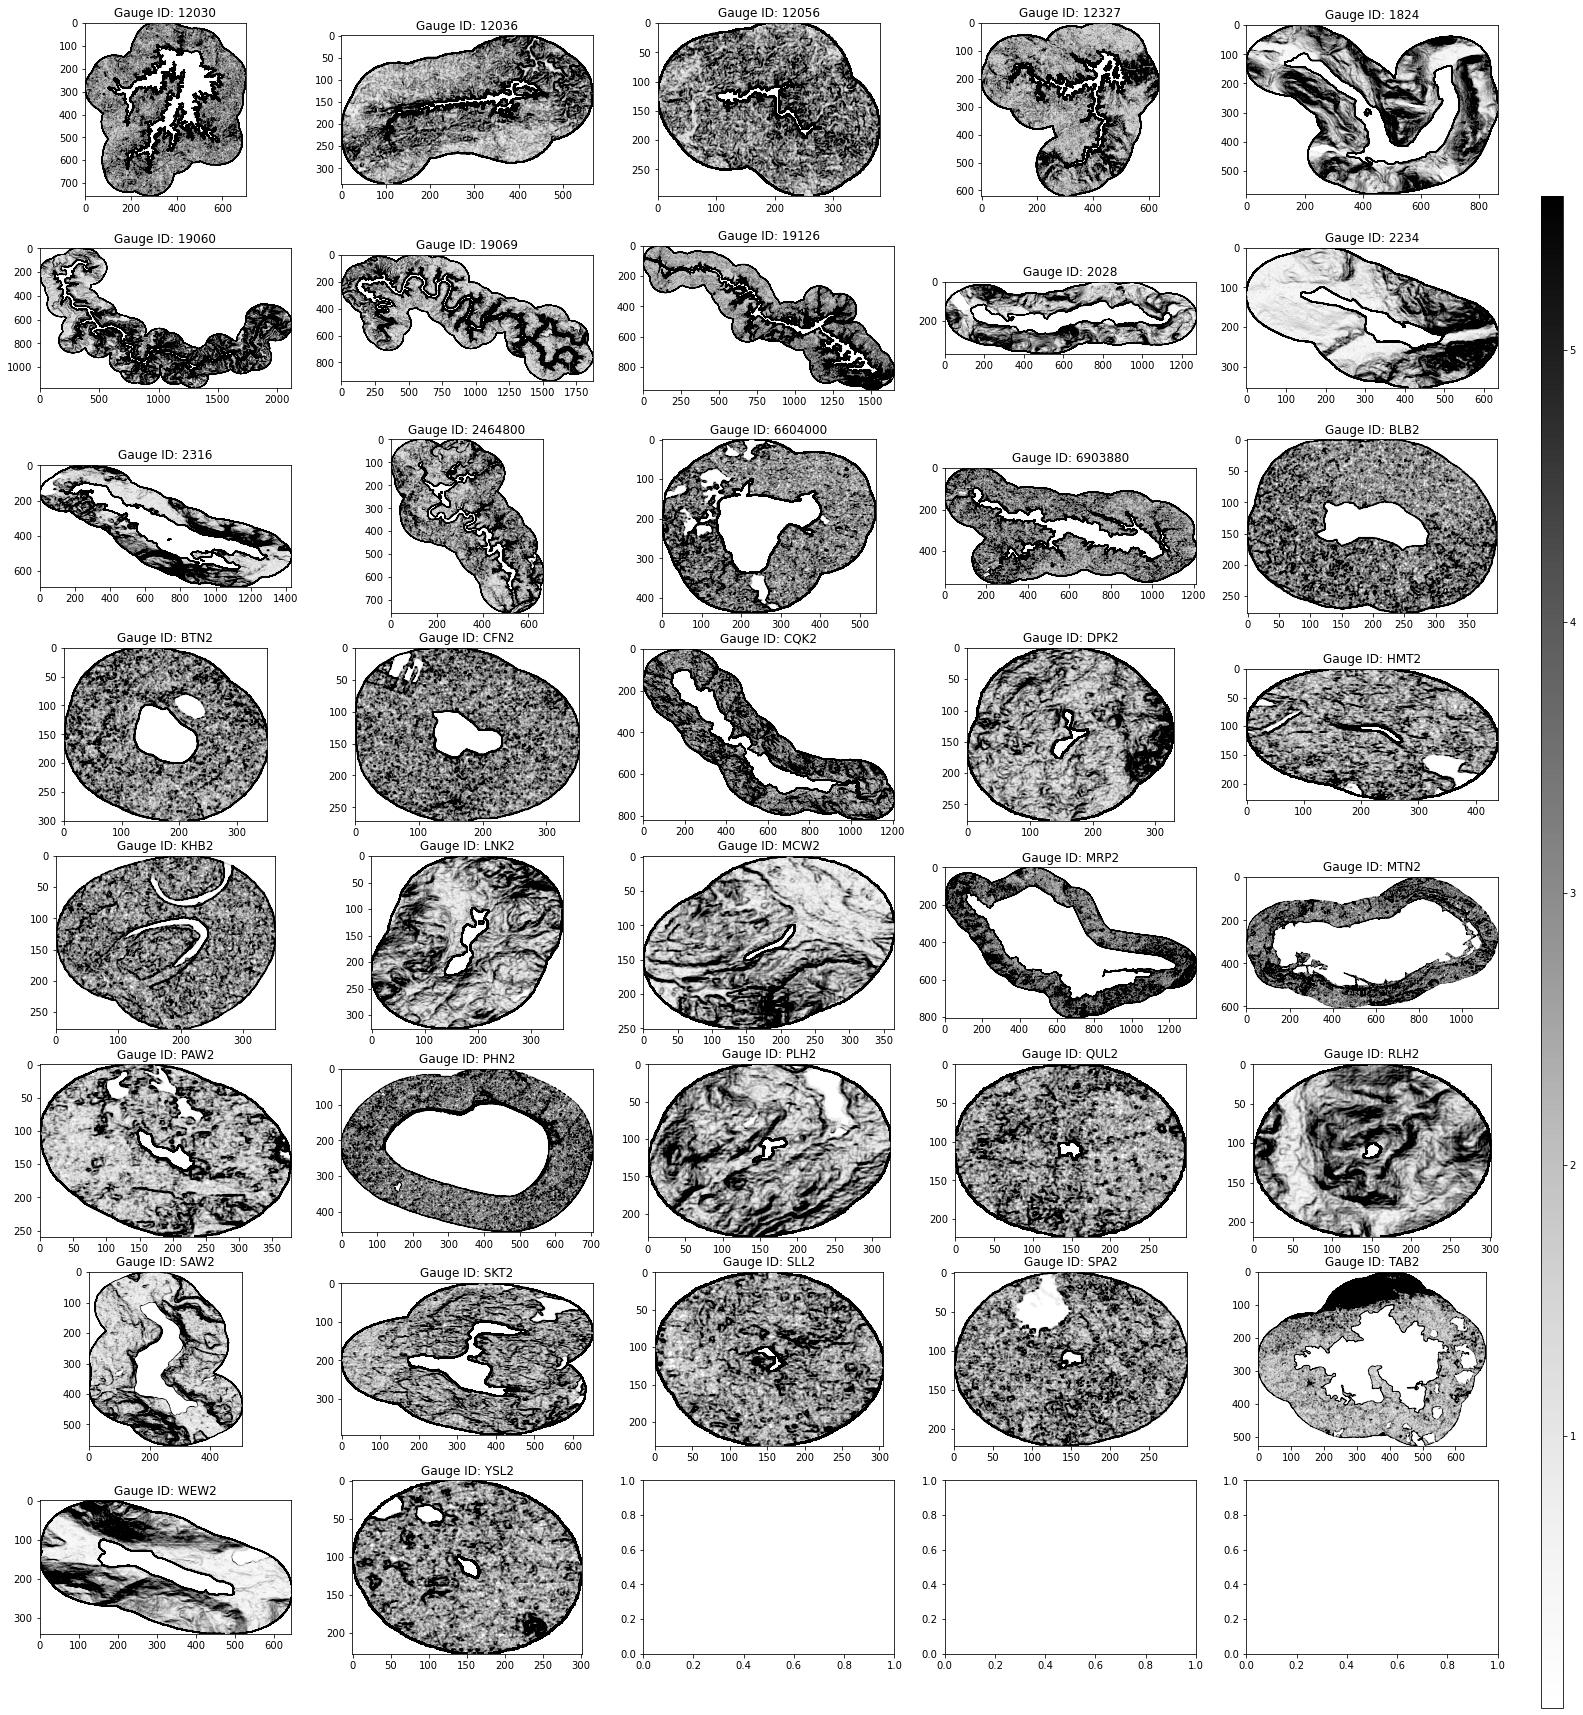

In [31]:

row_f=8
col_f=5
nfig=1
fig, axes = plt.subplots(nrows=row_f, ncols=col_f, figsize=(30, 30))
ax=0
ay=-1
rastervals=pd.DataFrame()

for f in df_files['file_name'].values:
    # im=plt.subplot(row_f,col_f,nfig) 
    
    src = rasterio.open(dir_srtm+f)
    rvalues=src.read(1)
    # ic(rvalues.shape)
    p90=np.percentile(rvalues,90)
    
    st_id=f.split('_')[2].split('.')[0]
    if st_id=='RAW2': #Taking RAW2 out since is not a valid lake
        continue
    vals=pd.DataFrame({st_id:rvalues[(rvalues>0) & (rvalues<p90)]})
    rastervals=pd.concat((rastervals,vals), axis=1)
# rvalues=rvalues[(rvalues>0) & (rvalues<p90)]
# rvalues.shape
    if ay<col_f-1:
        ay+=1
        # if ax==row_f:
        # ax+=1
    else:
        ay=0
        ax+=1
    # ic((ax,ay))
    # ax=axes[ax][ay]
    im=axes[ax][ay].imshow(rvalues, cmap='Greys',vmin=0.0001, vmax=p90)
    axes[ax][ay].set_title('Gauge ID: '+ st_id)
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.1, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
plt.savefig('../data/results/TRI_3km_lakes.png')
plt.show()
    # nfig+=1

In [28]:
rastervals_3km=rastervals
rastervals_3km=rastervals_3km.rename(columns={'660400':'6604000'})
r_median=rastervals_3km.median()
r_mean=rastervals_3km.mean()
r_max=rastervals_3km.max()
r_min=rastervals_3km.min()
r_count=rastervals_3km.count()
r_std=rastervals_3km.std()
r_median.index

Index(['12030', '12036', '12056', '12327', '1824', '19060', '19069', '19126',
       '2028', '2234', '2316', '2464800', '6604000', '6903880', 'BLB2', 'BTN2',
       'CFN2', 'CQK2', 'DPK2', 'HMT2', 'KHB2', 'LNK2', 'MCW2', 'MRP2', 'MTN2',
       'PAW2', 'PHN2', 'PLH2', 'QUL2', 'RLH2', 'SAW2', 'SKT2', 'SLL2', 'SPA2',
       'TAB2', 'WEW2', 'YSL2'],
      dtype='object')

In [50]:
type(rastervals_3km)

pandas.core.frame.DataFrame

In [7]:
df_stats=pd.DataFrame({'median':r_median, 'mean':r_mean, 'max':r_max,'min':r_min,'count':r_count,'std':r_std}).reset_index()
df_stats=df_stats.rename(columns={'index':'gauge_id'})
df_stats.to_csv('../data/results/TRI_stats_3km_2.csv', sep=',')
# df_stats.loc[df_stats['gauge_id']=='660400', 'gauge_id']='6604000'

In [8]:
df_stats

gauge_id     median       mean        max  min   count        std
0     12030   4.582576   4.709094   8.426149  1.0  262907   1.657993
1     12036  11.445523  11.817531  22.226110  1.0  109303   4.656494
2     12056   7.483315   7.539050  12.884099  1.0   71432   2.628441
3     12327   3.741657   3.923342   7.874008  1.0  203075   1.555820
4      1824  22.090721  22.074057  42.766811  1.0  232980  11.032963
5     19060  16.431677  16.645891  31.032242  1.0  670216   7.586003
6     19069  11.180340  12.124949  26.057629  1.0  624527   5.901251
7     19126   3.872983   4.007920   7.483315  1.0  388475   1.533410
8      2028  18.920887  19.574404  40.211937  1.0  229412  10.001721
9      2234   7.615773  10.282146  29.866369  1.0  112440   7.562487
10     2316   4.690416   5.483689  12.609520  1.0  250022   3.117325
11  2464800   5.744563   6.033195  11.661903  1.0  225579   2.523467
12  6604000   2.449490   2.505205   4.242640  1.0  111626   0.812939
13  6903880   4.898980   5.091018   9.110434  1.0  324617   1.849326
14     BLB2   2.645751   2.689648   4.472136  1.0   69396   0.848612
15     BTN2   3.316625   3.400623   5.916080  1.0   63972   1.166931
16     CFN2   3.316625   3.289279   5.477226  1.0   61336   1.050867
17     CQK2   4.242640   4.315975   7.211102  1.0  247404   1.525079
18     DPK2   5.000000   5.287360  10.440307  1.0   60644   2.198161
19     HMT2   3.000000   3.224987   6.000000  1.0   64100   1.210183
20     KHB2   2.828427   2.969488   5.099020  1.0   61761   0.990776
21     LNK2   9.591663  10.053139  20.273134  1.0   76715   4.570384
22     MCW2   7.416198   7.986133  17.888544  1.0   60052   4.202769
23     MRP2   3.000000   2.997544   4.690416  1.0  233237   0.924915
24     MTN2   2.828427   2.761123   4.358899  1.0  205854   0.861623
25     PAW2   4.000000   4.386209   9.695360  1.0   61573   2.053272
26     PHN2   2.449490   2.562359   4.000000  1.0  130313   0.762211
27     PLH2   8.246211   8.612290  17.233688  1.0   49808   3.790944
28     QUL2   2.828427   3.013134   5.477226  1.0   45987   1.083135
29     RLH2  13.674794  13.791090  26.210686  1.0   45773   5.997904
30     SAW2   5.291502   6.144687  14.866069  1.0  159379   3.431125
31     SKT2   3.162278   3.404483   6.480741  1.0  143172   1.340648
32     SLL2   3.000000   3.238443   6.000000  1.0   47897   1.183328
33     SPA2   7.000000   7.186306  13.000000  1.0   43573   2.635975
34     TAB2   3.000000   3.162946   6.855655  1.0  142868   1.290089
35     WEW2  15.620500  17.206295  42.602818  1.0  114025  11.240526
36     YSL2   2.828427   2.952523   5.477226  1.0   45616   1.051234

In [9]:
path_results='../data/results/comparison_ALL_20220525_17_38.csv'
# path_results='/data/results/comparison_LOCSS_20220525_18_48.csv'


df_results=pd.read_csv(path_results)
stations=df_results.station.unique()
stations

array(['1824', '2028', '2234', '2316', '12030', '12036', '19060', '19069',
       '19126', '2464800', '6604000', '6903880', 'BTN2', 'CFN2', 'HMT2',
       'KHB2', 'PHN2', 'QUL2', 'SAW2', 'SLL2', 'TAB2', 'WEW2', 'YSL2'],
      dtype=object)

In [10]:
for st in stations:
    if st not in df_stats['gauge_id'].values:
        print(st)

In [83]:
 os.path.isfile(path_results)

False

In [89]:
c=os.getcwd()
c+c+path_results

'C:\\Users\\amgomez\\Documents\\Python Scripts\\pylocssC:\\Users\\amgomez\\Documents\\Python Scripts\\pylocss/data/results/comparison_ALL_20220525_17_38.csv'

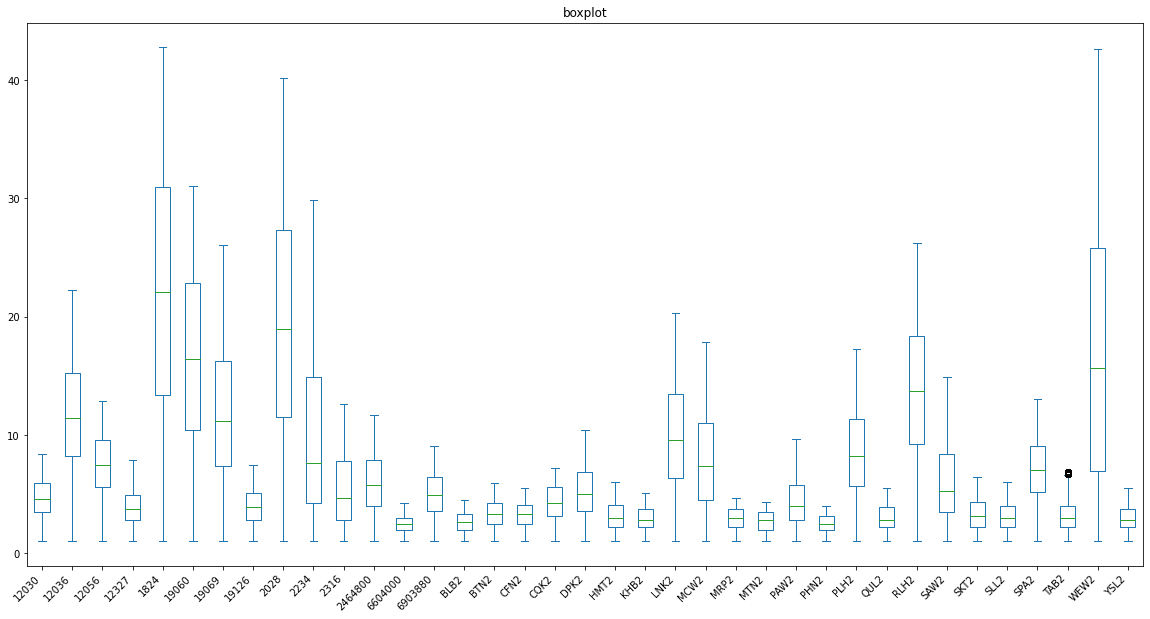

In [29]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [20, 10]

ax = rastervals_3km.plot(kind='box', title='boxplot')
for label in ax.get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
plt.savefig('../data/results/TRI_3km_lakes_variability_2.png')
plt.show()
    # nfig+=1

In [58]:
files_1km=[f for f in files if '1km' in f]

In [59]:
len(files_1km)

38

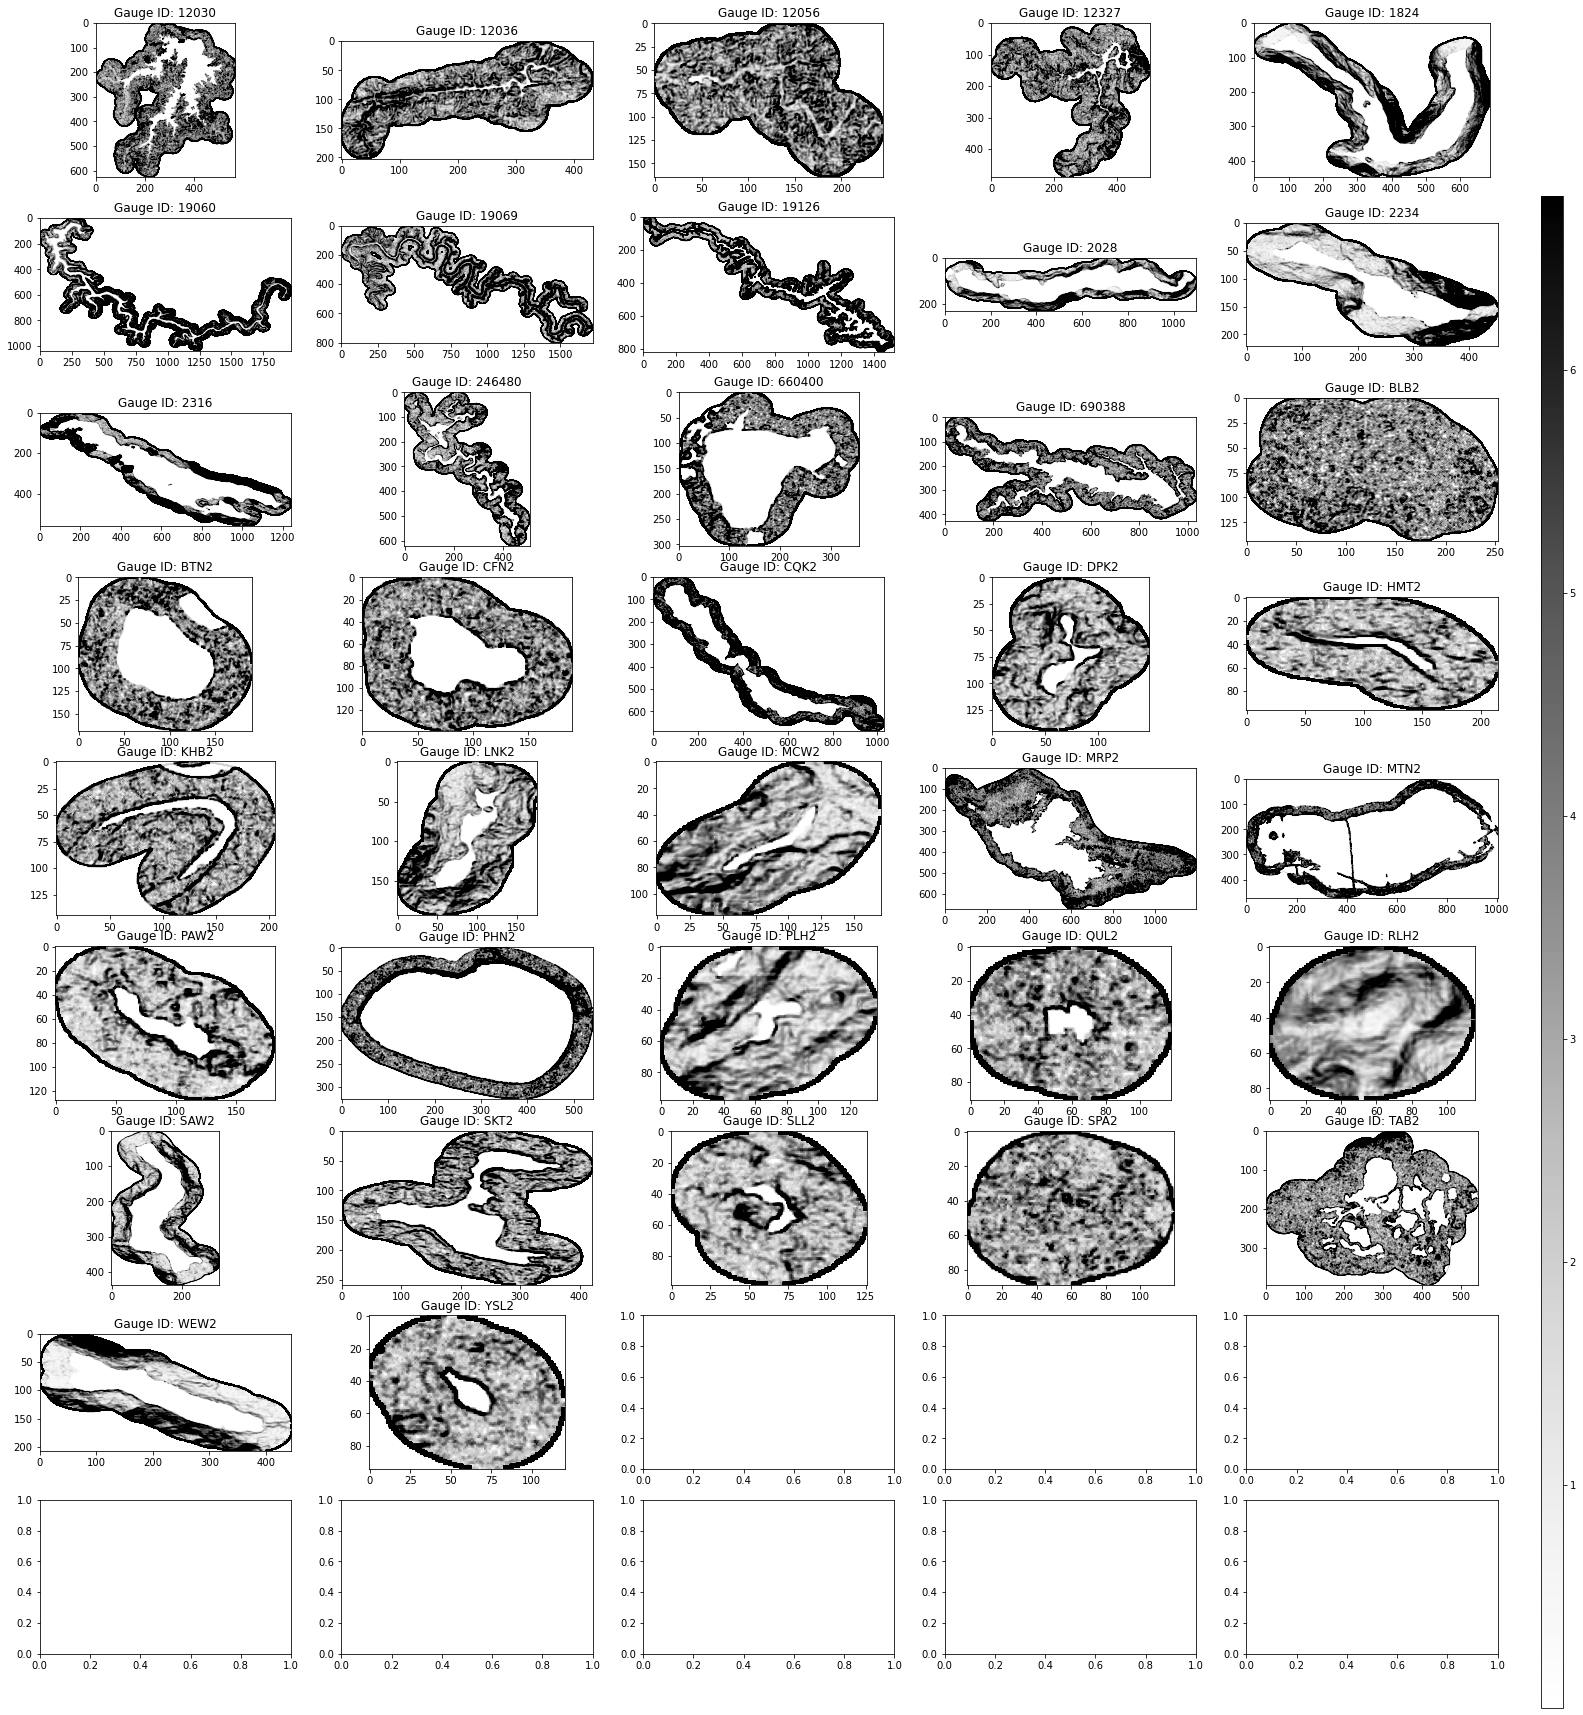

In [61]:

row_f=9
col_f=5
nfig=1
fig, axes = plt.subplots(nrows=row_f, ncols=col_f, figsize=(30, 30))
ax=0
ay=-1
rastervals=pd.DataFrame()

for f in files_1km:
    # im=plt.subplot(row_f,col_f,nfig) 
    
    src = rasterio.open(dir_srtm+f)
    rvalues=src.read(1)
    # ic(rvalues.shape)
    p90=np.percentile(rvalues,90)
    
    st_id=f.split('_')[2].split('.')[0]
    if st_id=='RAW2': #Taking RAW2 out since is not a valid lake
        continue
    vals=pd.DataFrame({st_id:rvalues[(rvalues>0) & (rvalues<p90)]})
    rastervals=pd.concat((rastervals,vals), axis=1)
# rvalues=rvalues[(rvalues>0) & (rvalues<p90)]
# rvalues.shape
    if ay<col_f-1:
        ay+=1
        # if ax==row_f:
        # ax+=1
    else:
        ay=0
        ax+=1
    # ic((ax,ay))
    # ax=axes[ax][ay]
    im=axes[ax][ay].imshow(rvalues, cmap='Greys',vmin=0.0001, vmax=p90)
    axes[ax][ay].set_title('Gauge ID: '+ st_id)
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.1, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
# plt.savefig('../data/results/TRI_1km_lakes.png')
plt.show()
    # nfig+=1

In [63]:
rastervals_1km=rastervals
rastervals_1km=rastervals_1km.rename(columns={'660400':'6604000',
                                             '246480':'2464800',
                                             '690388':'6903880'})
r_median=rastervals_1km.median()
r_mean=  rastervals_1km.mean()
r_max=   rastervals_1km.max()
r_min=   rastervals_1km.min()
r_count= rastervals_1km.count()
r_std=   rastervals_1km.std()
r_median.index

Index(['12030', '12036', '12056', '12327', '1824', '19060', '19069', '19126',
       '2028', '2234', '2316', '2464800', '6604000', '6903880', 'BLB2', 'BTN2',
       'CFN2', 'CQK2', 'DPK2', 'HMT2', 'KHB2', 'LNK2', 'MCW2', 'MRP2', 'MTN2',
       'PAW2', 'PHN2', 'PLH2', 'QUL2', 'RLH2', 'SAW2', 'SKT2', 'SLL2', 'SPA2',
       'TAB2', 'WEW2', 'YSL2'],
      dtype='object')

In [67]:
df_stats=pd.DataFrame({'median':r_median, 'mean':r_mean, 'max':r_max,'min':r_min,'count':r_count,'std':r_std}).reset_index()
df_stats=df_stats.rename(columns={'index':'gauge_id'})
df_stats.to_csv('../data/results/TRI_stats_1km.csv', sep=',')

In [65]:
for st in stations:
    if st not in df_stats['gauge_id'].values:
        print(st)

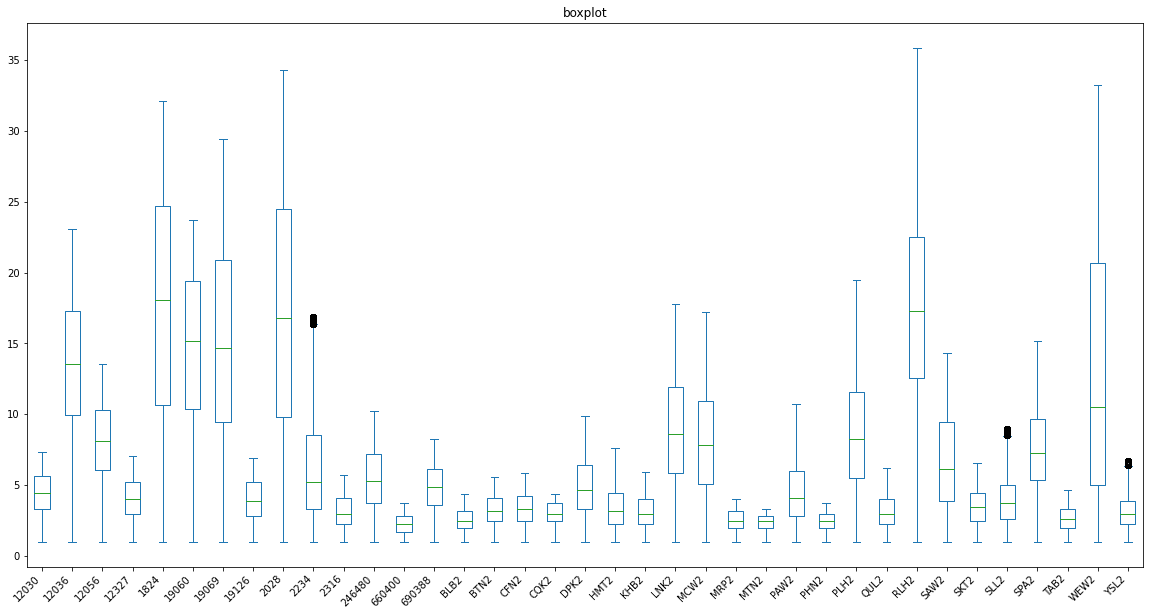

In [66]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [20, 10]

ax = rastervals.plot(kind='box', title='boxplot')
for label in ax.get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
plt.savefig('../data/results/TRI_1km_lakes_variability.png')
plt.show()

ic| rvalues.shape: (528, 693)


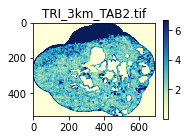

ic| rvalues.shape: (220, 302)


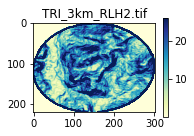

In [ ]:
from icecream import ic
row_f=2
col_f=2
nfig=1

fig, axes = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(20, 10))

for f in ['TRI_3km_TAB2.tif', 'TRI_3km_RLH2.tif']:
    im=plt.subplot(row_f,col_f,nfig) 
    src = rasterio.open(dir_srtm+f)
    rvalues=src.read(1)
    ic(rvalues.shape)
    p90=np.percentile(rvalues,90)
# rvalues=rvalues[(rvalues>0) & (rvalues<p90)]
# rvalues.shape
    pyplot.imshow(rvalues, cmap='YlGnBu',vmin=0.0001, vmax=p90)
    title_obj = pyplot.title(f)
    color_bar = pyplot.colorbar() 
    pyplot.show()

In [22]:
src.read(1).flatten().mean()

17.385874

In [20]:
len(src.read(1).flatten())

108224

In [31]:
rgt0=np.array([a for a in src.read(1).flatten() if a>0])

In [38]:
np.percentile(rgt0,50)#mean()

2.8284270763397217

In [27]:
band_max

0.0